In [1102]:
#pip install -r requirements.txt
#Import pandas
import pandas as pd

#Import dataset
df = pd.read_csv("germany.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536527,22809,SET OF 6 T-LIGHTS SANTA,6,12/1/2010 13:04,2.95,12662,Germany
1,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,12/1/2010 13:04,2.55,12662,Germany
2,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,12/1/2010 13:04,0.85,12662,Germany
3,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,12/1/2010 13:04,1.65,12662,Germany
4,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,12/1/2010 13:04,1.95,12662,Germany


In [1103]:
#Drop Country column
df.drop(columns=["Country"], inplace=True)
#Remove C from any row in InvoiceNo column
df["InvoiceNo"] = df["InvoiceNo"].str.replace("C", "", regex=True)
#Convert InvoiceNo from Dtype object to int32
df['InvoiceNo'] = df['InvoiceNo'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9495 entries, 0 to 9494
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    9495 non-null   int32  
 1   StockCode    9495 non-null   object 
 2   Description  9495 non-null   object 
 3   Quantity     9495 non-null   int64  
 4   InvoiceDate  9495 non-null   object 
 5   UnitPrice    9495 non-null   float64
 6   CustomerID   9495 non-null   int64  
dtypes: float64(1), int32(1), int64(2), object(3)
memory usage: 482.3+ KB


In [1104]:
df.loc[df['InvoiceNo'] == 536527]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536527,22809,SET OF 6 T-LIGHTS SANTA,6,12/1/2010 13:04,2.95,12662
1,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,12/1/2010 13:04,2.55,12662
2,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,12/1/2010 13:04,0.85,12662
3,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,12/1/2010 13:04,1.65,12662
4,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,12/1/2010 13:04,1.95,12662
5,536527,22243,5 HOOK HANGER RED MAGIC TOADSTOOL,12,12/1/2010 13:04,1.65,12662
6,536527,47421,ASSORTED COLOUR LIZARD SUCTION HOOK,24,12/1/2010 13:04,0.42,12662
7,536527,20712,JUMBO BAG WOODLAND ANIMALS,10,12/1/2010 13:04,1.95,12662
8,536527,20713,JUMBO BAG OWLS,10,12/1/2010 13:04,1.95,12662
9,536527,22837,HOT WATER BOTTLE BABUSHKA,4,12/1/2010 13:04,4.65,12662


In [1105]:
#Check for number of unique values, used for testing/ checking
df["CustomerID"].nunique()

95

In [1106]:
#Group all instances by CustomerID, multiply each instances Quantity by UnitPrice in each group and sum them all up
PurchaseSumPerCustomerID = df.groupby("CustomerID").apply(lambda x: (x["Quantity"] * x["UnitPrice"]).sum())

#Check if it worked and what the sum up Customer purchase is
CustomerID = 12662
print(f"Money: €{PurchaseSumPerCustomerID.loc[CustomerID]}")

Money: €3817.08


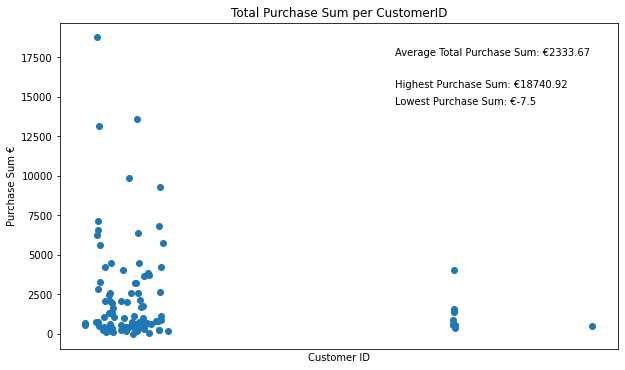

In [1107]:
#Import matplotlib
import matplotlib.pylab as plt

#Average, highest, lowest of all customers and rounded to 2 decimal palces
average = PurchaseSumPerCustomerID.mean().round(decimals=2)
highest = PurchaseSumPerCustomerID.max()
lowest = PurchaseSumPerCustomerID.min()

#Increases graph size, MUST BE HERE OR IT DOES NOT WORK
plt.figure(figsize=(10,6))

# Create a scatter plot
plt.scatter(PurchaseSumPerCustomerID.index, PurchaseSumPerCustomerID)

#Remove X axis label
plt.tick_params(axis="x", bottom=False, labelbottom=False)

# Add labels and title
plt.xlabel("Customer ID")
plt.ylabel("Purchase Sum €")
plt.title("Total Purchase Sum per CustomerID")

#Add "Average, Highest, Lowest Purchase Sum:" to top right of graph, "transform..." make it so it's relative to the chart axis
plt.text(0.6, 0.9, f"Average Total Purchase Sum: €{average}", transform=plt.gca().transAxes)
plt.text(0.6, 0.8, f"Highest Purchase Sum: €{highest}", transform=plt.gca().transAxes)
plt.text(0.6, 0.75, f"Lowest Purchase Sum: €{lowest}", transform=plt.gca().transAxes)

plt.show()

In [1108]:
#Find all customers with Sum of less than 0
print(PurchaseSumPerCustomerID[PurchaseSumPerCustomerID < 0])

#Display negative cusomers purchases
df.loc[df['CustomerID'] == 12605]

CustomerID
12605   -7.5
dtype: float64


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
258,538123,22331,WOODLAND PARTY BAG + STICKER SET,-1,12/9/2010 15:41,1.65,12605
259,538123,22333,RETROSPOT PARTY BAG + STICKER SET,-1,12/9/2010 15:41,1.65,12605
260,538123,22956,36 FOIL HEART CAKE CASES,-2,12/9/2010 15:41,2.10,12605


## Linear Regression
<h5>Sales over time</h5>

In [1109]:
#Create copy of dataframe
regression = df
#Drop unecessary features
regression = regression.drop(columns=["InvoiceNo", "StockCode", "Description", "CustomerID"])

#Create new feature called sumPreRow, place it at the end of existing dataframe
regression["sumPerRow"] = regression.apply(lambda x: x["Quantity"] * x["UnitPrice"], axis=1)
#Remove time from InvoiceDate feature
regression["InvoiceDate"] = regression["InvoiceDate"].str.split(" ").str[0]
#Convert from string to datetime Dtype
regression["InvoiceDate"] = pd.to_datetime(regression["InvoiceDate"])

regression.head()

,Quantity,InvoiceDate,UnitPrice,sumPerRow
0,6,2010-12-01,2.95,17.7
1,6,2010-12-01,2.55,15.3
2,12,2010-12-01,0.85,10.2
3,12,2010-12-01,1.65,19.8
4,12,2010-12-01,1.95,23.4


In [1110]:
#Group all instances by unique dates and sum up all number in remaining features
grouped = regression.groupby(['InvoiceDate']).sum()
grouped.head()

,Quantity,UnitPrice,sumPerRow
InvoiceDate,,,
2010-12-01,117,93.82,139.18
2010-12-02,146,51.95,138.35
2010-12-03,170,115.84,555.53
2010-12-05,1362,373.58,2476.69
2010-12-06,85,56.83,162.44


In [1111]:
#Check 
grouped.describe().round(decimals=2)

,Quantity,UnitPrice,sumPerRow
count,232.00,232.00,232.00
mean,506.24,162.35,955.60
std,642.18,216.05,1238.37
min,-97.00,0.39,-237.26
25%,93.75,50.93,236.00
50%,335.00,102.08,625.94
75%,667.75,191.38,1215.21
max,5825.00,2134.80,12165.25


In [1112]:
#Check
grouped.loc[grouped['sumPerRow'] == 12165.25]
#Drop anomalous data point
grouped = grouped[grouped.index != "2011-05-12"]

In [1113]:
#Import package
from scipy import stats
import datetime

#Convert the dates to ordinal numbers
ordinalDates = grouped.index.to_series().apply(datetime.datetime.toordinal)

#Calculate slope, intercept, R, P and standard Error
slope, intercept, r, p, se = stats.linregress(ordinalDates, grouped["sumPerRow"])

#Estimation change variable slope, in this case it is positive
print("Slope:", slope)
print("Intercept:", intercept)
#R value indicates how accurate it is
print("R value:", r)
#Represents statistic significant
print("P value:", p)
#Lower better, it goes above 1
print("Standard Error:", se)

Slope: 1.1073199654934696
Intercept: -812205.5890029164
R value: 0.12255785233228414
P value: 0.06293792754374082
Standard Error: 0.5925538980010843


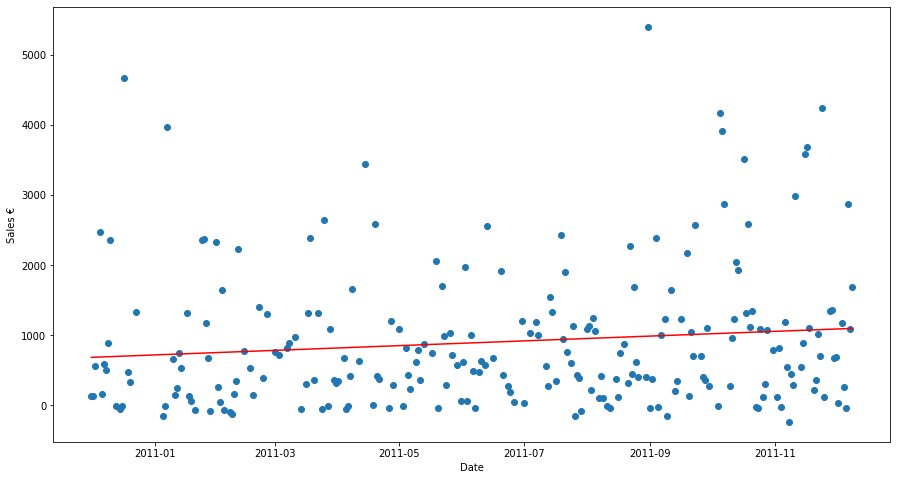

In [1114]:
#Import matplotlib and numpy
import matplotlib.pyplot as plt
import numpy as np

#best fit function calculation
def bestFit(x):
    return slope * x + intercept

#Convert the ordinal dates back to human-readable dates
humanDates = [datetime.date.fromordinal(d) for d in ordinalDates]

plt.figure(figsize=(15, 8))

#Create a scatter plot of the data
plt.scatter(humanDates, grouped["sumPerRow"])

#Label the axes
plt.ylabel("Sales €")
plt.xlabel("Date")

#Calculate the best fit line
model = list(map(bestFit, ordinalDates))

#Plot the best fit line
plt.plot(humanDates, model, color="red")

# Display the chart
plt.show()

## Logistic Regression